In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
!pip install ultralytics==8.0.20
!pip install roboflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import os
HOME = os.getcwd()

In [4]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

/content/datasets


In [5]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.5/166.8 GB disk)


In [6]:
from roboflow import Roboflow
rf = Roboflow(api_key="HDll2oFm5X8KK35ziZJL")
project = rf.workspace("casestudy1").project("smart-traffic-light")
dataset = project.version(27).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to smart-traffic-light-27 in yolov5pytorch:: 100%|██████████| 2006/2006 [00:01<00:00, 1658.58it/s]


In [7]:
base_raw_data_path = os.path.join(dataset.location, "train/images")

In [8]:
# collecting count of different image size
import cv2
res_count_dict = {}
for img_file in os.listdir(base_raw_data_path):
  im = cv2.imread(os.path.join(base_raw_data_path,img_file))
  if im.shape[:2] not in res_count_dict:
    res_count_dict[im.shape[:2]] = 0
  res_count_dict[im.shape[:2]] += 1 

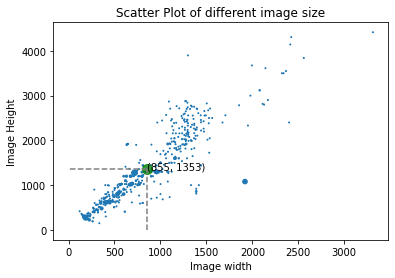

In [9]:
x = [key[0] for key in res_count_dict.keys()]
y = [key[1] for key in res_count_dict.keys()]
size = [value for value in res_count_dict.values()]
plt.scatter(x, y, s=size)

avg_x, avg_y = np.mean(x), np.mean(y)
plt.scatter(avg_x, avg_y, s=100, c='green', alpha=0.8, label='Average')
plt.annotate(f"({int(avg_x)}, {int(avg_y)})", (avg_x, avg_y))

plt.plot([avg_x, avg_x], [0, avg_y], '--', color='gray')
plt.plot([avg_x, 0], [avg_y, avg_y], '--', color='gray')

plt.xlabel('Image width')
plt.ylabel('Image Height')
plt.title('Scatter Plot of different image size')
plt.show()

### YOLOv5

In [10]:
!git clone https://github.com/prabhupad26/yolov5.git  # clone repo
!git checkout feature/training_changes

Cloning into 'yolov5'...
remote: Enumerating objects: 11993, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 11993 (delta 2), reused 4 (delta 2), pack-reused 11987
Receiving objects: 100% (11993/11993), 65.35 MiB | 37.87 MiB/s, done.
Resolving deltas: 100% (7944/7944), done.
fatal: not a git repository (or any of the parent directories): .git


In [11]:
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

/content/datasets/yolov5


In [12]:
import train

In [13]:
f'{dataset.location}/data.yaml'

'/content/datasets/smart-traffic-light-27/data.yaml'

In [14]:
os.path.isdir('/content/datasets/yolov5/smart-traffic-light-27/valid/images')

False

In [16]:
test_sizes = [300, 400, 500, 600, 700, 800, 900, 1000, 1100]
target_models = ['yolov5s.pt', 'yolov5m.pt']
for model_name in target_models:
  for test_size in test_sizes:
    print(f"Training with {model_name} with size {test_size}")
    train.run(data=f'/content/datasets/smart-traffic-light-27/data.yaml', imgsz=test_size, weights=model_name)

train: weights=yolov5s.pt, cfg=, data=/content/datasets/smart-traffic-light-27/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=300, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest


Training with yolov5s.pt with size 300


github: ⚠️ YOLOv5 is out of date by 3 commits. Use 'git pull ultralytics master' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5 🚀 v7.0-117-g85f6019 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspective=0.0, flipud=0.0, fliplr=0.5, mosaic=1.0, mixup=0.0, copy_paste=0.0
ClearML: run 'pip install clearml' to automatically track, visualize and remotely train YOLOv5 🚀 in ClearML
Comet: run 'pip install comet_ml' to automatically track and visualize YOLOv5 🚀 runs in Comet
TensorBoard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/


  0%|          | 0.00/14.1M [00:00<?, ?B/s]


Overriding model.yaml nc=80 with nc=7

                 from  n    params  module                                  arguments                     
  0                -1  1      3520  models.common.Conv                      [3, 32, 6, 2, 2]              
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     18816  models.common.C3                        [64, 64, 1]                   
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  4                -1  2    115712  models.common.C3                        [128, 128, 2]                 
  5                -1  1    295424  models.common.Conv                      [128, 256, 3, 2]              
  6                -1  3    625152  models.common.C3                        [256, 256, 3]                 
  7                -1  1   1180672  models.common.Conv                      [256, 512, 3, 2]            

Training with yolov5s.pt with size 400


github: ⚠️ YOLOv5 is out of date by 3 commits. Use 'git pull ultralytics master' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5 🚀 v7.0-117-g85f6019 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspective=0.0, flipud=0.0, fliplr=0.5, mosaic=1.0, mixup=0.0, copy_paste=0.0
ClearML: run 'pip install clearml' to automatically track, visualize and remotely train YOLOv5 🚀 in ClearML
Comet: run 'pip install comet_ml' to automatically track and visualize YOLOv5 🚀 runs in Comet
TensorBoard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
Overriding model.yaml nc=80 with nc=7

                 from  n    params  module    

Training with yolov5s.pt with size 500


github: ⚠️ YOLOv5 is out of date by 3 commits. Use 'git pull ultralytics master' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5 🚀 v7.0-117-g85f6019 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspective=0.0, flipud=0.0, fliplr=0.5, mosaic=1.0, mixup=0.0, copy_paste=0.0
ClearML: run 'pip install clearml' to automatically track, visualize and remotely train YOLOv5 🚀 in ClearML
Comet: run 'pip install comet_ml' to automatically track and visualize YOLOv5 🚀 runs in Comet
TensorBoard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
Overriding model.yaml nc=80 with nc=7

                 from  n    params  module    

Training with yolov5s.pt with size 600


github: ⚠️ YOLOv5 is out of date by 3 commits. Use 'git pull ultralytics master' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5 🚀 v7.0-117-g85f6019 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspective=0.0, flipud=0.0, fliplr=0.5, mosaic=1.0, mixup=0.0, copy_paste=0.0
ClearML: run 'pip install clearml' to automatically track, visualize and remotely train YOLOv5 🚀 in ClearML
Comet: run 'pip install comet_ml' to automatically track and visualize YOLOv5 🚀 runs in Comet
TensorBoard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
Overriding model.yaml nc=80 with nc=7

                 from  n    params  module    

Training with yolov5s.pt with size 700


github: ⚠️ YOLOv5 is out of date by 3 commits. Use 'git pull ultralytics master' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5 🚀 v7.0-117-g85f6019 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspective=0.0, flipud=0.0, fliplr=0.5, mosaic=1.0, mixup=0.0, copy_paste=0.0
ClearML: run 'pip install clearml' to automatically track, visualize and remotely train YOLOv5 🚀 in ClearML
Comet: run 'pip install comet_ml' to automatically track and visualize YOLOv5 🚀 runs in Comet
TensorBoard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
Overriding model.yaml nc=80 with nc=7

                 from  n    params  module    

KeyboardInterrupt: ignored